# Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/sample_data/StudentPerformanceFactors.csv', delimiter=";")
display(data)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,100
1,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
2,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
3,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
4,28,90,Low,Medium,Yes,9,91,Medium,Yes,0,Medium,Medium,Public,Positive,2,No,College,Moderate,Female,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,14,67,Low,Low,Yes,7,66,Low,Yes,0,Low,Medium,Public,Neutral,4,No,High School,Far,Female,57
6603,9,64,Medium,Low,Yes,10,68,Low,Yes,0,Medium,Medium,Private,Negative,3,No,High School,Near,Male,57
6604,3,60,Medium,Low,Yes,6,78,Low,Yes,1,Low,Medium,Public,Positive,1,No,Postgraduate,Near,Female,57
6605,5,65,Low,High,No,7,71,Medium,Yes,0,Low,Medium,Private,Negative,2,No,College,Far,Male,56


In [ ]:
df = data[['Gender', 'Parental_Education_Level', 'Hours_Studied', 'Exam_Score']]
display(df)

,Gender,Parental_Education_Level,Hours_Studied,Exam_Score
0,Female,High School,27,100
1,Female,College,18,100
2,Male,High School,23,99
3,Female,High School,14,99
4,Female,College,28,98
...,...,...,...,...
6602,Female,High School,14,57
6603,Male,High School,9,57
6604,Female,Postgraduate,3,57
6605,Male,College,5,56


# Preparation


**1. Menangani Missing Values**

In [ ]:
print("Nilai Hilang:\n", df.isnull().sum())

df.dropna(inplace=True)

Nilai Hilang:
 Gender                       0
Parental_Education_Level    90
Hours_Studied                0
Exam_Score                   0
dtype: int64


<ipython-input-8-b73443aef945>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


**2. Kategorisasi Pass_Status**

In [ ]:
def categorize_pass_fail(score):
    return 'Lulus' if score >= 67 else 'Tidak Lulus'

df['Pass_Status'] = df['Exam_Score'].apply(categorize_pass_fail)
df.drop('Exam_Score', axis=1, inplace=True)

category_distribution = df['Pass_Status'].value_counts()
print(category_distribution)

Pass_Status
Lulus          3679
Tidak Lulus    2838
Name: count, dtype: int64


<ipython-input-9-d9f1c2db25de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pass_Status'] = df['Exam_Score'].apply(categorize_pass_fail)
<ipython-input-9-d9f1c2db25de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Exam_Score', axis=1, inplace=True)


**3. Encoding variabel kategorikal**

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['Parental_Education_Level'])
df['Pass_Status'] = df['Pass_Status'].map({'Lulus': 1, 'Tidak Lulus': 0})

df['Parental_Education_Level_College'] = df['Parental_Education_Level_College'].astype(int)
df['Parental_Education_Level_High School'] = df['Parental_Education_Level_High School'].astype(int)
df['Parental_Education_Level_Postgraduate'] = df['Parental_Education_Level_Postgraduate'].astype(int)

df.head(-5)

<ipython-input-10-844dedd613b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


,Gender,Hours_Studied,Pass_Status,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,1,27,1,0,1,0
1,1,18,1,1,0,0
2,0,23,1,0,1,0
3,1,14,1,0,1,0
4,1,28,1,1,0,0
...,...,...,...,...,...,...
6597,0,11,0,1,0,0
6598,1,10,0,0,1,0
6599,0,13,0,0,1,0
6600,0,4,0,0,0,1


**4. Normalisasi Hours_Studied**

In [ ]:
scaler = MinMaxScaler()
df[['Hours_Studied']] = scaler.fit_transform(df[['Hours_Studied']])

df.head(-5)

,Gender,Hours_Studied,Pass_Status,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,1,0.604651,1,0,1,0
1,1,0.395349,1,1,0,0
2,0,0.511628,1,0,1,0
3,1,0.302326,1,0,1,0
4,1,0.627907,1,1,0,0
...,...,...,...,...,...,...
6597,0,0.232558,0,1,0,0
6598,1,0.209302,0,0,1,0
6599,0,0.279070,0,0,1,0
6600,0,0.069767,0,0,0,1


# Modelling Decision Tree dan KNN

**1. Split Data**

In [ ]:
X = df.drop(columns=['Pass_Status'])
y = df['Pass_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2. Modelling Decision Tree dan Evaluasi Model Decision Tree**

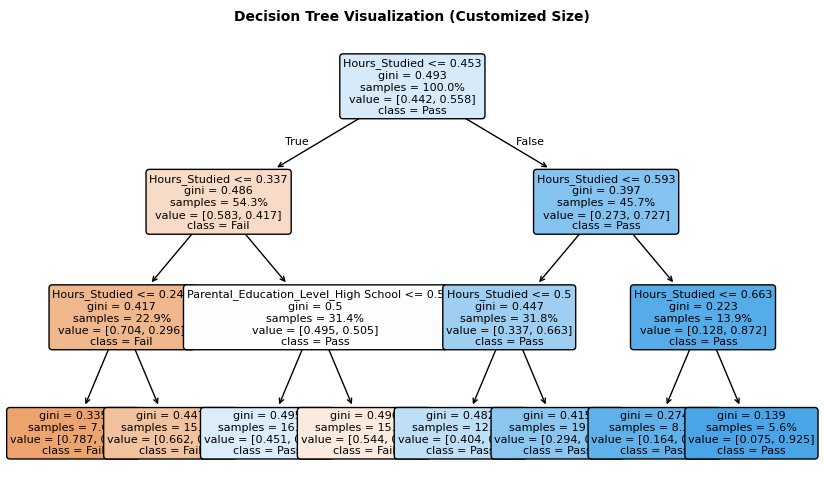

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


plt.figure(figsize=(10, 6))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Fail', 'Pass'],
    filled=True,
    fontsize=8,
    proportion=True,
    rounded=True
)
plt.title("Decision Tree Visualization (Customized Size)", fontsize=10, weight='bold')
plt.show()

**3. Evaluasi Decision Tree**

Decision Tree - Accuracy: 0.6886503067484663
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61       536
           1       0.72      0.76      0.74       768

    accuracy                           0.69      1304
   macro avg       0.68      0.67      0.67      1304
weighted avg       0.69      0.69      0.69      1304

Decision Tree - Confusion Matrix:
 [[314 222]
 [184 584]]


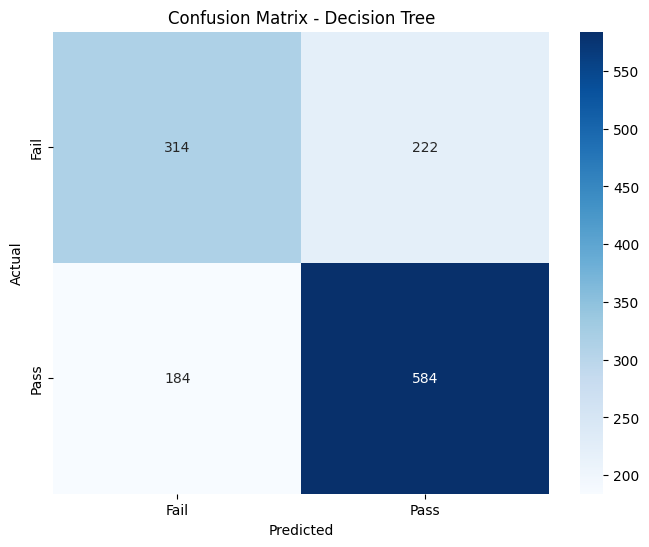

In [ ]:
y_pred_dt = clf.predict(X_test)

print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**4. Modelling KNN**

Best K is: 14 | Cross-validation Accuracy: 0.6476
KNN - Test Accuracy: 0.6756134969325154
KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.69      0.64       536
           1       0.76      0.66      0.71       768

    accuracy                           0.68      1304
   macro avg       0.67      0.68      0.67      1304
weighted avg       0.69      0.68      0.68      1304



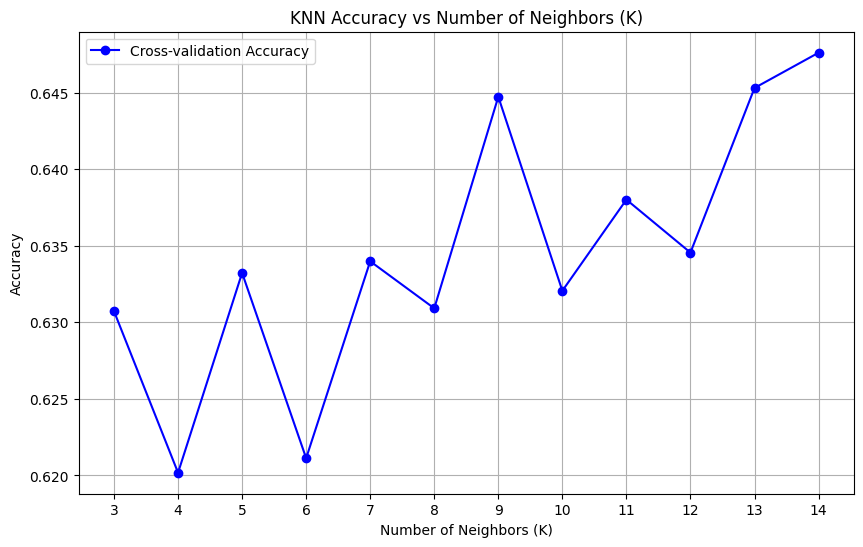

In [ ]:
best_score = 0.0
acc_list = []

for k in range(3, 15):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, algorithm='auto')

    scores = cross_val_score(knn_classifier, X_train, y_train, cv=10, scoring='accuracy')
    mean_score = scores.mean()
    acc_list.append(mean_score)

    if mean_score > best_score:
        best_score = mean_score
        best_clf = knn_classifier
        best_k = k

print(f"Best K is: {best_k} | Cross-validation Accuracy: {best_score:.4f}")
clf_knn = best_clf

clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("KNN - Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

plt.figure(figsize=(10, 6))
plt.plot(range(3, 15), acc_list, marker='o', linestyle='-', color='b', label='Cross-validation Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(3, 15))
plt.legend()
plt.grid()
plt.show()

**5. Evaluasi Model KNN**

KNN - Accuracy: 0.6756134969325154
KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.69      0.64       536
           1       0.76      0.66      0.71       768

    accuracy                           0.68      1304
   macro avg       0.67      0.68      0.67      1304
weighted avg       0.69      0.68      0.68      1304



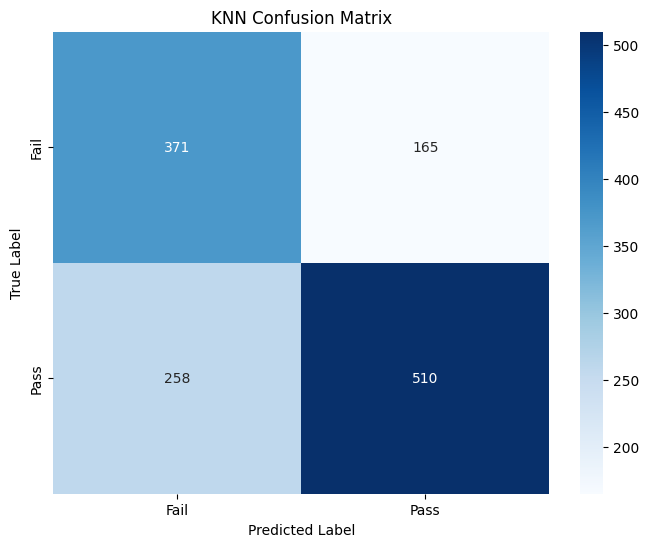

In [ ]:
print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Perbandingan Decision Tree dan KNN

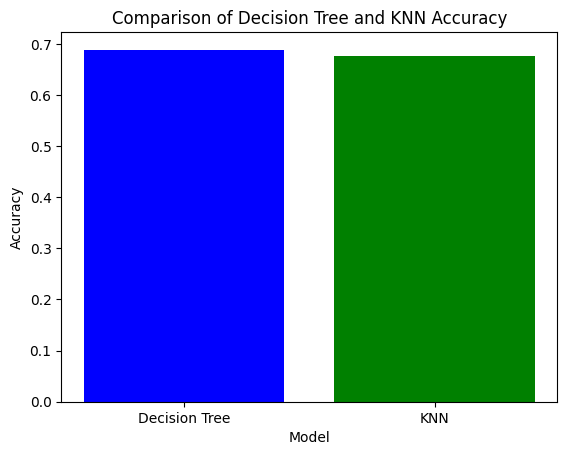

In [ ]:
models = ['Decision Tree', 'KNN']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn)]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Comparison of Decision Tree and KNN Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()